<a href="https://colab.research.google.com/github/CodeWithMayank-Py/ML-Models/blob/main/File_tuning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor = None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
!wget -O "images.png" "https://w7.pngwing.com/pngs/808/21/png-transparent-goat-sheep-cartoon-goat-mammal-animals-cow-goat-family-thumbnail.png"

--2023-10-13 06:27:11--  https://w7.pngwing.com/pngs/808/21/png-transparent-goat-sheep-cartoon-goat-mammal-animals-cow-goat-family-thumbnail.png
Resolving w7.pngwing.com (w7.pngwing.com)... 104.21.73.185, 172.67.165.106, 2606:4700:3035::ac43:a56a, ...
Connecting to w7.pngwing.com (w7.pngwing.com)|104.21.73.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16684 (16K) [image/png]
Saving to: ‘images.png’

images.png          100%[===================>]  16.29K  --.-KB/s    in 0s      

2023-10-13 06:27:11 (78.6 MB/s) - ‘images.png’ saved [16684/16684]



In [ ]:
sample_img = tf.keras.utils.load_img(
    "/content/images.png",
    grayscale=False,
    color_mode="rgb",
    target_size=(224, 224),
    interpolation='nearest',
    keep_aspect_ratio=False
)

In [ ]:
sample_img.size

(224, 224)

In [ ]:
type(sample_img)

PIL.Image.Image

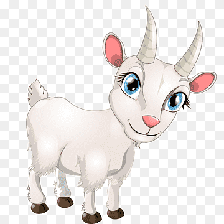

In [ ]:
sample_img

In [ ]:
sample_img_array = tf.keras.utils.img_to_array(sample_img)

In [ ]:
type(sample_img_array)

numpy.ndarray

In [ ]:
sample_img_array.shape

(224, 224, 3)

In [ ]:
img_array = tf.expand_dims(sample_img_array, axis=0)

In [ ]:
img_array.shape

TensorShape([1, 224, 224, 3])

In [ ]:
processed_img_batch = tf.keras.applications.vgg16.preprocess_input(img_array)

In [ ]:
prediction = model(processed_img_batch)

In [ ]:
decoded_predictions = tf.keras.applications.vgg16.decode_predictions(prediction.numpy(), top=5)

In [ ]:
decoded_predictions

[[('n02085620', 'Chihuahua', 0.13271958),
  ('n03944341', 'pinwheel', 0.097586535),
  ('n03724870', 'mask', 0.06373484),
  ('n04116512', 'rubber_eraser', 0.060953878),
  ('n02123597', 'Siamese_cat', 0.03850044)]]

In [ ]:
for prediction in decoded_predictions[0]:
  print(f"I think the given image is of {prediction[1]} (class code: {prediction[0]}) with",
        f"probability of {prediction[2]*100}")

I think the given image is of Chihuahua (class code: n02085620) with probability of 13.271957635879517
I think the given image is of pinwheel (class code: n03944341) with probability of 9.758653491735458
I think the given image is of mask (class code: n03724870) with probability of 6.3734836876392365
I think the given image is of rubber_eraser (class code: n04116512) with probability of 6.095387786626816
I think the given image is of Siamese_cat (class code: n02123597) with probability of 3.850043937563896
